In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Conc_data=pd.read_csv('Concrete_Data.csv')
Conc_data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
Conc_data.shape

(1030, 9)

In [4]:
Conc_data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [5]:
Conc_data.csMPa.value_counts()

33.40    6
77.30    4
79.30    4
31.35    4
71.30    4
        ..
47.40    1
51.96    1
56.74    1
17.57    1
32.77    1
Name: csMPa, Length: 845, dtype: int64

In [6]:
Conc_data.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x=Conc_data.drop('csMPa',axis=1)
y=Conc_data['csMPa']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)

Lasso(alpha=0.1)

### Evaluation by Score method

In [10]:
reg.score(x_test,y_test)

0.6128936724346628

### Evaluation by Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(reg,x,y,cv=5)
cross_val_score

array([0.33349165, 0.41130792, 0.45124798, 0.60680093, 0.50463913])

In [12]:
np.mean(cross_val_score)

0.4614975210525218

In [13]:
y_pred=reg.predict(x_test)

In [14]:
reg.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
params = {'alpha': [0.001,0.1,1,100],
         'tol':[0.01,0.1,100,1000],
         'warm_start':[True],
         'selection':['random']}
lasso=Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 5)
lasso_model.fit(x_train, y_train)
best_lasso_model = lasso_model.best_estimator_
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.001, 'selection': 'random', 'tol': 0.01, 'warm_start': True}
0.6041153119480485


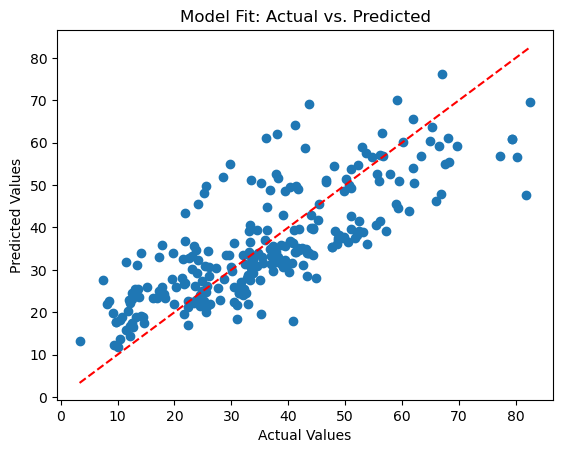

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_true' is the actual target values, and 'y_pred' is the predicted values.
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Fit: Actual vs. Predicted")
plt.show()


## Using Ridge regression model

In [17]:
from sklearn import linear_model
lr_model = linear_model.Ridge(alpha=.5)
lr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

### Evaluating the model using the score method

In [18]:
lr_model.score(x_test,y_test)

0.6129553162941959

### Evaluating the model using the cross validation method

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score2=cross_val_score(lr_model,x,y,cv=5)
cross_val_score2

array([0.3301647 , 0.41207015, 0.4517547 , 0.6072496 , 0.50374536])

In [20]:
lr_model.get_params()

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [21]:
np.random.seed(42)
# Lets shuffle the data
Conc_data_shuffled=Conc_data.sample(frac=1)
#Splitting
x_s=Conc_data_shuffled.drop('csMPa',axis=1)
y_s=Conc_data_shuffled['csMPa']


In [22]:
x_s.shape,y_s.shape

((1030, 8), (1030,))

In [23]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_s,y_s,test_size=0.15,random_state=0)

In [24]:
model_s=linear_model.Ridge()

In [25]:
x_train_s.shape,y_train_s.shape

((875, 8), (875,))

In [26]:
model_s.fit(x_train_s,y_train_s)
model_s.score(x_test_s,y_test_s)

0.6564448461313568

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
params = {'alpha': [0.001,0.01,10,100],
         'tol':[0.01,1,20,1000],
         }
lr_model2=model_s
ridge_model = GridSearchCV(lr_model2, params, cv = 5)
ridge_model.fit(x_train_s, y_train_s)
best_ridge_model = ridge_model.best_estimator_
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 100, 'tol': 0.01}
0.5909451319582534


## Using Decision Tree Regression

In [29]:
from sklearn import tree
model_tree = tree.DecisionTreeRegressor()
model_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
model_tree.score(x_test,y_test)

0.8730591901026945

The decision tree appears to be the best estimator for this because it is not affected by data with poor scaling issues.Tree-based algorithms are fairly insensitive to the scale of the features. Think about it, a decision tree only splits a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. Other features do not influence this split on a feature.

So, the remaining features have virtually no effect on the split. This is what makes them invariant to the scale of the features!

In [31]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
model_tree.criterion

'squared_error'

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
params = {'ccp_alpha': [0.1,1,10],
         'min_impurity_decrease':[0.01,1,10],
         'min_samples_split':[2,0.1,10],
          'min_samples_leaf':[0.01,0.1,1],
          'criterion':['friedman_mse'],
          'max_depth':[20,0.2,100],
         'splitter':['best']}
tree_model = GridSearchCV(model_tree, params, cv = 5)
tree_model.fit(x_train, y_train)
best_tree_model = tree_model.best_estimator_
print(tree_model.best_params_)
print(tree_model.best_score_)

{'ccp_alpha': 0.1, 'criterion': 'friedman_mse', 'max_depth': 100, 'min_impurity_decrease': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.8006385437674834


In [74]:
y_pred2=tree_model.predict(x_test)

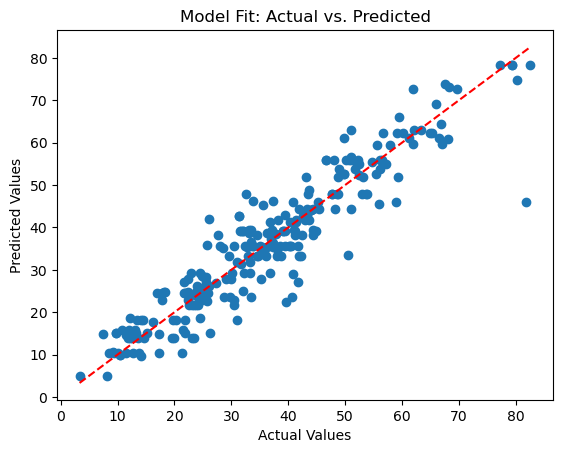

In [75]:
# Assuming 'y_true' is the actual target values, and 'y_pred' is the predicted values.
plt.scatter(y_test, y_pred2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Fit: Actual vs. Predicted")
plt.show()


## Feature scaling

Feature scaling is a crucial preprocessing step in many machine learning and data analysis tasks. It involves transforming the values of your dataset's features into a common scale. This is important because many machine learning algorithms are sensitive to the magnitude of the input features, and having features on different scales can lead to issues during model training and prediction.

### Normalization (Min-Max Scaling)
Normalization scales all feature values to a range between 0 and 1. This is achieved by subtracting the minimum value of the feature from each data point and then dividing it by the range (the difference between the maximum and minimum values).
Find more info [here](https://scikit-learn.org/stable/modules/preprocessing.html) 

In [76]:
from sklearn import preprocessing
Normal=preprocessing.MinMaxScaler()

In [80]:
Normal_xtrain=Normal.fit_transform(x_train)
Normal_xtest=Normal.fit_transform(x_test)

In [110]:
reg3 = linear_model.Lasso(alpha=0.1)
reg3.fit(Normal_xtrain,y_train)

Lasso(alpha=0.1)

In [111]:
reg3.score(Normal_xtest,y_test)

0.5988536035020215

#### Standardization

Standardization is another scaling method where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.
* It centers data around the mean and scales to a standard deviation of 1
* It is Useful when the distribution of the data is Gaussian or unknown
* Less sensitive to outliers

In [117]:
scaler=preprocessing.StandardScaler().fit(x_train)

In [121]:
xtrain_scaled=scaler.transform(x_train)
xtest_scaled=scaler.transform(x_test)

In [122]:
reg4 = linear_model.Lasso(alpha=0.1)
reg4.fit(xtrain_scaled,y_train)

Lasso(alpha=0.1)

In [124]:
reg4.score(xtest_scaled,y_test)

0.6151129194062221

It appears that applying normalization and standardization to the the data did not bring about any significant changes. The Decision tree regressor, however, proved to be good at working with data with poor scaling. 